In [46]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

from torchvision import models
from visualization.modules import LayeredModule
from visualization.data import *
from visualization.image_proc import *
from visualization.interpret import show_vanilla_backprop

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
model = LayeredModule.from_alexnet(models.alexnet(pretrained=True), hook_to_activations=True)

In [48]:
original_img, name, target_class = get_example_data(0, img_path='../old_visual/input_images/')

In [49]:
prep_img = preprocess_image(original_img)

In [52]:
tuple(prep_img.shape[2:])

(224, 224)

In [23]:
gradients = model.get_gradients_for_sample(prep_img, target_class)

In [24]:
vanilla_grads = gradients['input'].numpy()[0]

In [25]:
vanilla_grads.shape

(3, 224, 224)

In [26]:
vanilla_grads_color = normalize_to_range(vanilla_grads)

In [27]:
vanilla_grads_color.shape

(3, 224, 224)

In [28]:
vanilla_grads_gray = convert_to_grayscale(vanilla_grads)
vanilla_grads_gray.shape

(224, 224)

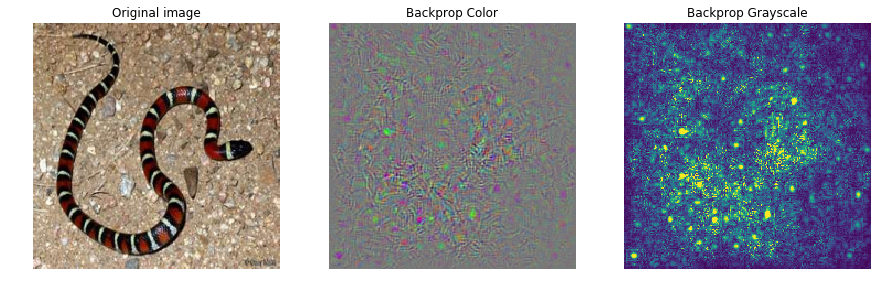

In [31]:
show_images([original_img, vanilla_grads_color, vanilla_grads_gray], ['Original image', 'Backprop Color', 'Backprop Grayscale']);

In [41]:
def get_vanilla_backprop(example_index):
    original_img, name, target_class = get_example_data(example_index, img_path='../old_visual/input_images/')
    pretrained_model = models.alexnet(pretrained=True)
    # Vanilla backprop
    model = LayeredModule.from_alexnet(pretrained_model, hook_to_activations=True)
    # Generate and show gradients
    prep_img = preprocess_image(original_img)
    show_vanilla_backprop(model, prep_img, target_class)

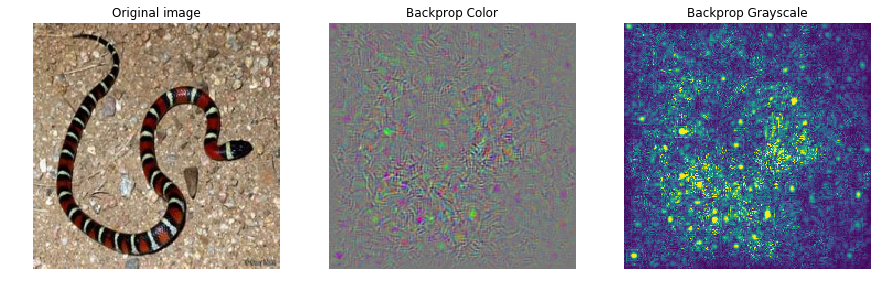

In [42]:
get_vanilla_backprop(0)

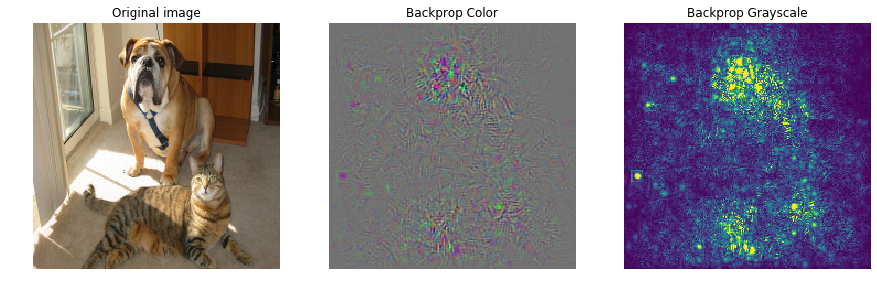

In [43]:
get_vanilla_backprop(1)

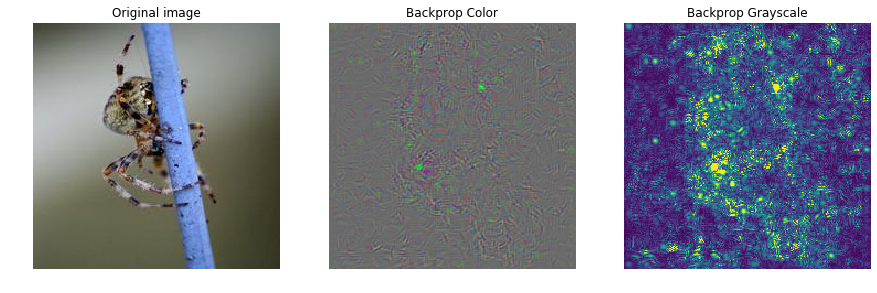

In [44]:
get_vanilla_backprop(2)